In [1]:
from read_dat import *
from time import time
import numpy as np


file = read_dat('../STNG.dat')

init complete


In [2]:
L=[[],[]]
S=[[],[]]
for i in range(500):#read 500 events
	event = file.read_event()
	for j in range(len(event)): #per channel
		S[j].append(event[j].get_pulse_shape())
		L[j].append(event[j].get_long_integral())

/home/mkidson/gitRepos/dDAQ_dev/radical_changes/event.py:89: RuntimeWarning: invalid value encountered in scalar divide
  return self.shortIntegral / self.longIntegral


In [3]:
%matplotlib tk
file.add_selections(mode='p', file='test_cuts.csv')

Selections Imported
Polygons Created


In [4]:
cut_L, cut_S = file.select_events(L[0], S[0], cut_id=[0, 1], inc=[-1, 1], visual=True)

In [3]:
# file.lst_out(1000, [0], True, False, filename='lst_out.csv')
file.lst_out(1000, [0], True, False, cuts=[0, 2], inc=[1, 1], filename='cut_lst_out.csv')

1000 events
End reading


In [4]:
csv_in = np.genfromtxt('cut_lst_out.csv', delimiter=',', skip_header=2)

In [5]:
L = csv_in[...,0]
S = csv_in[...,1]

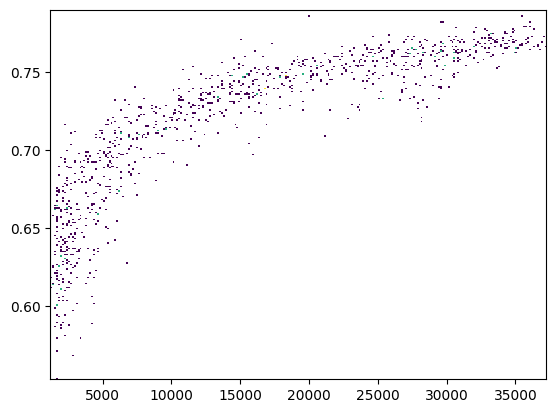

In [6]:
plt.hist2d(L, S, [256,256], norm=colors.LogNorm(vmin=1))
plt.show()

In [2]:
t0 = time()
for i in range(100):
    ev = file.read_event()
t1 = time()

print(t1-t0)

# 1.8332114219665527 <-- previous method

1.8332114219665527


In [4]:
f = open('../STNG.dat', 'rb')
header = f.read(72)
pream = f.read(280)
f.close()

print(np.frombuffer(pream, dtype=np.uint32))

[   6016      31       0       3       0 2508037    1500    1500       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0       0       0
       0       0       0       0       0       0       0]
